## I. Loading and Inspecting Data

In [1]:
import pandas as pd

In [2]:
birddata = pd.read_csv("bird_tracking.csv")

In [3]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [4]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


## II. Simple data visualisations

In [5]:
import matplotlib.pyplot as plt
import numpy as np

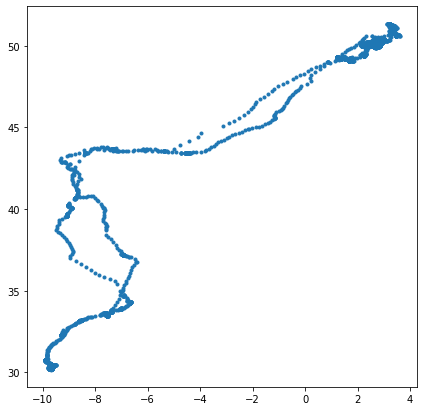

In [8]:
ix = birddata.bird_name == "Eric"
x, y = birddata.longitude[ix], birddata.latitude[ix]
plt.figure(figsize=(7,7))
plt.plot(x, y, ".")
plt.show()

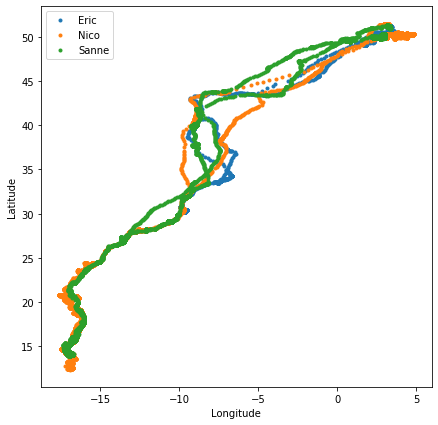

In [11]:
birds = birddata.bird_name.unique()
plt.figure(figsize=(7,7))

for bird in birds:
    ix = birddata.bird_name == bird
    x, y = birddata.longitude[ix], birddata.latitude[ix]    
    plt.plot(x, y, ".", label=bird)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

## III. Examining Flight Speed

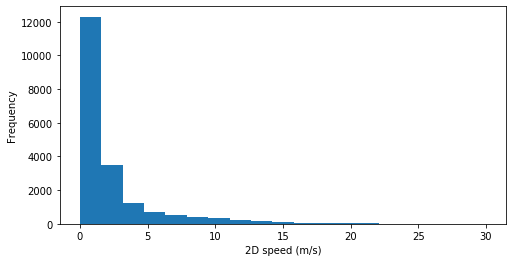

In [31]:
plt.figure(figsize=(8,4))
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0, 30, 20))
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency");

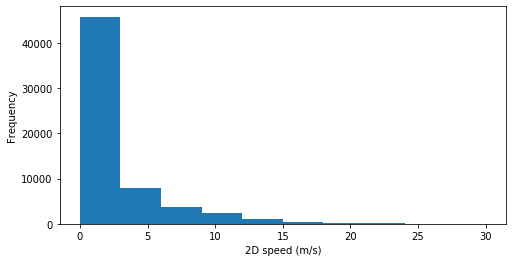

In [33]:
# histogram using pandas
plt.figure(figsize=(8,4))
birddata.speed_2d.plot(kind='hist', range=[0, 30])
plt.xlabel("2D speed (m/s)")
plt.show()

The benefit of using pandas for plotting is that we don't have to explicitly deal with NaN values.

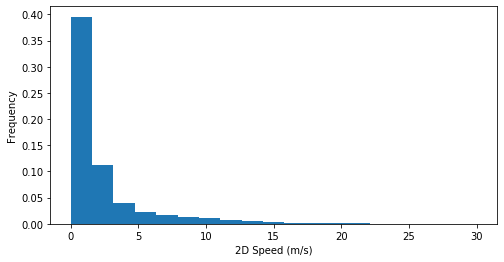

In [35]:
plt.figure(figsize=(8,4))
plt.hist(speed[~ind], bins=np.linspace(0, 30, 20), density=True)
plt.xlabel("2D Speed (m/s)")
plt.ylabel("Frequency")
plt.show()